# ANÁLISIS EXPLORATORIO DE DATOS DEL DATASET

Vamos a estudiar el dataset que nos proporcionan, para ello estudiaremos los siguientes puntos:
* Primera toma de contacto.
* Composición de filas y columnas del dataset y descripción de los campos.
* Comentar como relacionar los datos de las diferentes tablas.
* Valores perdidos y outlier e información relevante.
* Aportar gráficas para entender los datos.

In [1]:
# Importo las librerías básicas:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Empecemos con una primera toma de contacto de los datos

In [2]:
# Asigno los datos de películas a un dataframe

movies = pd.read_csv('./dataset/ml-latest-small/movies.csv')
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Asigno los datos de links a un dataframe

links = pd.read_csv('./dataset/ml-latest-small/links.csv')
links.head(5)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
# Asigno los datos de ratings a un dataframe

ratings = pd.read_csv('./dataset/ml-latest-small/ratings.csv')
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# Asigno los datos de tags a un dataframe

tags = pd.read_csv('./dataset/ml-latest-small/tags.csv')
tags.head(5)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


### Estudiamos la composición de filas y columnas del dataset.

Empecemos por el conjunto de datos **movies**.

In [6]:
movies.shape # (filas, columnas)

(9742, 3)

Vemos que el conjunto de datos dispone de 9742 filas y 3 columnas

In [7]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

Como vemos el dataset **movies** se compone de las siguientes 3 columnas:
* *movieId*: Es el identificador de la película.
* *title*: Es el título de la pelicula.
* *genres*: Es el género o los géneros donde se clasifica la película.

Sigamos por el conjunto de datos **links**.

In [8]:
links.shape

(9742, 3)

Vemos que el conjunto de datos dispone de 9742 filas y 3 columnas

In [9]:
links.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

Como vemos el dataset **links** se compone de las siguientes 3 columnas:

* *movieId*: Es el identificador de la película.
* *imdbId*: Es un identificador para películas utilizado por <http://www.imdb.com>
* *tmdbId*: Es un identificador de películas utilizado por <https://www.themoviedb.org>





Sigamos por el conjunto de datos **ratings**.

In [10]:
ratings.shape

(100836, 4)

Vemos que el conjunto de datos dispone de 100836 filas y 4 columnas.

In [11]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

Como vemos el dataset **ratings** se compone de las siguientes 4 columnas:

* *userId*: Es el identificador del usuario
* *movieId*: Es el identificador de la película.
* *rating*: Calificación de la película en una escala de 5 estrellas, con incrementos de media estrella (0.5 estrellas - 5.0 estrellas).
* *timestamp*: representan segundos desde la medianoche  de la Hora Universal Coordinada (UTC) del 1 de enero de 1970 del estreno de la película.


Terminamos con el conjunto de datos **tags**.


In [12]:
tags.shape

(3683, 4)

Vemos que el conjunto de datos dispone de 3683 filas y 4 columnas

In [13]:
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

Como vemos el dataset **tags** se compone de las siguientes 4 columnas:

* *userId*: Es el identificador del usuario
* *movieId*: Es el identificador de la película.
* *tag*: Las etiquetas son metadatos generados por el usuario sobre películas. Cada etiqueta es típicamente una sola palabra o frase corta. 
* *timestamp*: representan segundos desde la medianoche  de la Hora Universal Coordinada (UTC) del 1 de enero de 1970 de la colocación de la etiqueta.

### Comentamos como relacionar los datos de las diferentes tablas.

Como vemos, las tablas **ratings** y **tags** contienen el mismo Id, *userId*. Mediante dicha columna podemos establecer una aplicación entre dichas tablas: sabemos qué usuario ha colocado un tag a una película y cómo ha valorado a dicha película, así podemos saber que tag se correponde con que valoración por parte del mismo usuario.

Por otro lado, las cuatro tablas contienen el mismo Id, *moviesId*. Mediante dicha columna establecemos otra aplicación entre las 4 tablas. Sabemos para una misma película toda la información (la información del título, del género, la valoración que le dan los usuarios y las etiquetas que le proporcionan, etc).

### Valores perdidos y outlier

Estudiemos los valores perdidos tabla a tabla. Empecemos con la tabla **movies**.

In [14]:
df_movies = pd.DataFrame(movies)

total_movies = df_movies.isnull().sum().sort_values(ascending = False)
percent_movies = (df_movies.isnull().sum() / df_movies.isnull().count()).sort_values(ascending = False)
missing_data_movies = pd.concat([total_movies, percent_movies], axis = 1, keys = ['Total', 'Porcentaje'])
missing_data_movies.head(3)

,Total,Porcentaje
genres,0,0.0
title,0,0.0
movieId,0,0.0


Vemos que ésta tabla no tiene valores perdidos. Continuemos con la tabla **links**.

In [15]:
df_links = pd.DataFrame(links)

total_links = df_links.isnull().sum().sort_values(ascending = False)
percent_links = (df_links.isnull().sum() / df_links.isnull().count()).sort_values(ascending = False)
missing_data_links = pd.concat([total_links, percent_links], axis = 1, keys = ['Total', 'Porcentaje'])
missing_data_links.head(3)

,Total,Porcentaje
tmdbId,8,0.000821
imdbId,0,0.000000
movieId,0,0.000000


Vemos que esta tabla contiene 8 valores perdidos. Vamos a eliminar toda la fila.

In [16]:
df_links.dropna(inplace=True)

Podemos observar con la siguiente orden que ya no tenemos entradas nulas:

In [17]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9734 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9734 non-null   int64  
 1   imdbId   9734 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 304.2 KB


Continuemos con la tabla **ratings**.

In [18]:
df_ratings = pd.DataFrame(ratings)

total_ratings = df_ratings.isnull().sum().sort_values(ascending = False)
percent_ratings = (df_ratings.isnull().sum() / df_ratings.isnull().count()).sort_values(ascending = False)
missing_data_ratings = pd.concat([total_ratings, percent_ratings], axis = 1, keys = ['Total', 'Porcentaje'])
missing_data_ratings.head(4)

,Total,Porcentaje
timestamp,0,0.0
rating,0,0.0
movieId,0,0.0
userId,0,0.0


Vemos que ésta tabla no tiene valores perdidos. Continuemos con la tabla **tags**.

In [19]:
df_tags = pd.DataFrame(tags)

total_tags = df_tags.isnull().sum().sort_values(ascending = False)
percent_tags = (df_tags.isnull().sum() / df_tags.isnull().count()).sort_values(ascending = False)
missing_data_tags = pd.concat([total_tags, percent_tags], axis = 1, keys = ['Total', 'Porcentaje'])
missing_data_tags.head(4)

,Total,Porcentaje
timestamp,0,0.0
tag,0,0.0
movieId,0,0.0
userId,0,0.0


Observamos así que no tenemos valores perdidos en todo el dataset ya.

Por otro lados los datos atípicos u outliers pueden afectar marcadamente el modelo, además de suponer una fuente de información en sí misma. Su tratamiento es un asunto complejo que requiere más atención. Podríamos estudiar que no haya ids repetidos en las tablas, pues estos deben ser únicos por película y por usuario.

In [20]:
movies_id_unicos = df_movies['movieId'].unique()
print('Ids repetidos en la tabla movies', df_movies.shape[0] - len(movies_id_unicos))

Ids repetidos en la tabla movies 0


In [21]:
links_id_unicos = df_links['movieId'].unique()
print('Ids repetidos en la tabla movies', df_links.shape[0] - len(links_id_unicos))

Ids repetidos en la tabla movies 0


En las otras dos tablas pueden existir valores repetidos pues recordemos que un usuario puede valorar diferentes películas.

### Aportar gráficas para entender los datos.

Veamos un pequeño ejemplo de gráfico donde analizamos las puntuaciones dadas a la película con Id 1

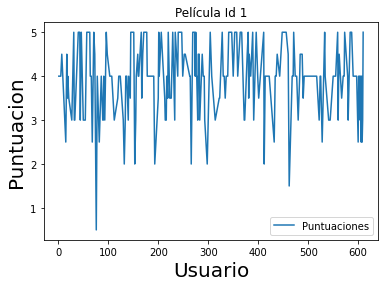

In [22]:
peliculaId1 = df_ratings[(df_ratings['movieId'] == 1)]
userIdDiferentes_PeliculaID1 = peliculaId1['userId'].unique()
puntuaciones = peliculaId1['rating'].values
df_plot = pd.DataFrame({'Puntuaciones': puntuaciones}, 
                       index=userIdDiferentes_PeliculaID1)
df_plot.plot()
plt.title('Película Id 1')
plt.xlabel('Usuario', fontsize=20);
plt.ylabel('Puntuacion', fontsize=20);

Podemos analizar las puntuaciones que ha proporcionado un usuario concreto, por ejemplo en forma de histograma:

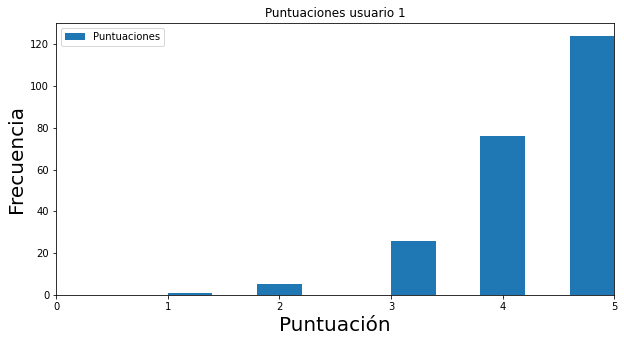

In [23]:
usuarioId1 = df_ratings[(df_ratings['userId'] == 1)]
puntuaciones = usuarioId1['rating'].values
df_plot = pd.DataFrame({'Puntuaciones': puntuaciones})
df_plot.plot(kind='hist',figsize=(10,5), xlim = [0, 5])
plt.title('Puntuaciones usuario 1')
plt.xlabel('Puntuación', fontsize=20);
plt.ylabel('Frecuencia', fontsize=20);


O expresado en función de densidad:

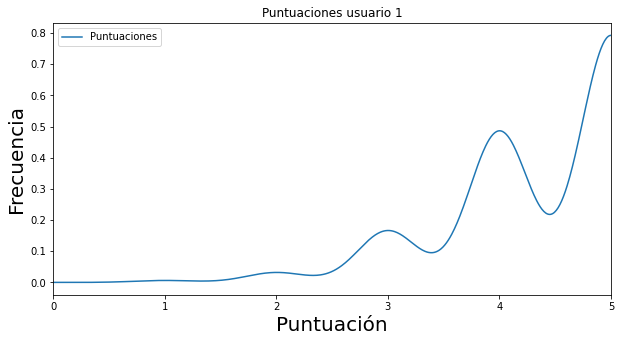

In [24]:
df_plot = pd.DataFrame({'Puntuaciones': puntuaciones})
df_plot.plot(kind='density',figsize=(10,5), xlim = [0, 5])
plt.title('Puntuaciones usuario 1')
plt.xlabel('Puntuación', fontsize=20);
plt.ylabel('Frecuencia', fontsize=20);

Podríamos así hacer muchísimos más ejemplos y seguir profundizando en el análisis del dataset, pero para lo que es pedido consideramos concluido este ejemplo sencillo de análisis exploratorio de datos con este pequeño dataset.